### Visualizing the distribution of the observations

### Load the required libraries

In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import urllib
import math
%pylab inline

import findspark
findspark.init()

from pyspark import SparkContext
#sc.stop()
sc = SparkContext(master="local[3]",pyFiles=['lib/numpy_pack.py','lib/spark_PCA.py','lib/computeStats.py'])

from pyspark import SparkContext
from pyspark.sql import *
sqlContext = SQLContext(sc)

import sys
sys.path.append('./lib')

import numpy as np
from numpy_pack import packArray,unpackArray
from spark_PCA import computeCov
from computeStats import computeOverAllDist, STAT_Descriptions

### Read the data frame from pickle file

data_dir='../../Data/Weather'

#file_index='BBBSBBBB'

file_index='SSSBSSBB'

from pickle import load

#read statistics
filename=data_dir+'/STAT_%s.pickle'%file_index
STAT,STAT_Descriptions = load(open(filename,'rb'))
print 'keys from STAT=',STAT.keys()

#read data
filename=data_dir+'/US_Weather_%s.parquet'%file_index

df=sqlContext.read.parquet(filename)
print df.count()
df.show(5)

Populating the interactive namespace from numpy and matplotlib
keys from STAT= ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']
12423
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|elevation|latitude|longitude|measurement|    station|undefs|              vector|  year|   label|
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|   1219.2|   37.75|  -117.65|       TMAX|USC00267465|    43|[30 55 40 56 80 5...|1898.0|SSSBSSBB|
|    640.1|  37.495|-119.9858|       TMAX|USC00045352|     3|[00 58 50 57 E0 5...|2007.0|SSSBSSBB|
|   1219.2|   37.75|  -117.65|       TMIN|USC00267465|    45|[90 D5 E0 D5 40 D...|1898.0|SSSBSSBB|
|    640.1|  37.495|-119.9858|       TMIN|USC00045352|    24|[00 46 00 46 E0 5...|2007.0|SSSBSSBB|
|   1452.4| 37.9747|-119.9161|       TMAX|USC00041697|     0|[80 54 00 53 80 5...|1956.0|SSSBSSBB|
+---------+--------+---------+-----------+-----------+------+-------------

In [57]:
#station = df.rdd.map(lambda row : (row['station'],1)).reduceByKey(lambda a, b: a+b).sort()
'''
 u'US1CACV0004',
 u'US1CAIN0002',
 u'US1CAMA0001',
 u'US1CAMA0002',
 u'US1CAMA0003',
 u'US1CAMN0001',
 u'US1CAMP0001',
 u'US1CAMP0002',
 u'US1CAMP0003',
 u'US1CAMP0004',
'''
sqlContext.registerDataFrameAsTable(df,'weather')
Query="SELECT DISTINCT latitude, longitude,station FROM weather\n\tWHERE measurement='%s' and station='%s' OR measurement='%s' and station='%s' OR measurement='%s' and station='%s' OR measurement='%s' and station='%s' OR measurement='%s' and station='%s' OR measurement='%s' and station='%s' OR measurement='%s' and station='%s' OR measurement='%s' and station='%s' OR measurement='%s' and station='%s' OR measurement='%s' and station='%s'"%('PRCP','US1CACV0004','PRCP','US1CAIN0002','PRCP','US1CAMA0001','PRCP','US1CAMA0002','PRCP','US1CAMA0003','PRCP','US1CAMN0001','PRCP','US1CAMP0001','PRCP','US1CAMP0002','PRCP','US1CAMP0003','PRCP','US1CAMP0004')
print Query
df1 = sqlContext.sql(Query)
print df1.count(),'rows'
df1.show()

SELECT DISTINCT latitude, longitude,station FROM weather
	WHERE measurement='PRCP' and station='US1CACV0004' OR measurement='PRCP' and station='US1CAIN0002' OR measurement='PRCP' and station='US1CAMA0001' OR measurement='PRCP' and station='US1CAMA0002' OR measurement='PRCP' and station='US1CAMA0003' OR measurement='PRCP' and station='US1CAMN0001' OR measurement='PRCP' and station='US1CAMP0001' OR measurement='PRCP' and station='US1CAMP0002' OR measurement='PRCP' and station='US1CAMP0003' OR measurement='PRCP' and station='US1CAMP0004'
10 rows
+--------+---------+-----------+
|latitude|longitude|    station|
+--------+---------+-----------+
| 37.3227|-118.5404|US1CAIN0002|
| 37.1241| -119.761|US1CAMA0003|
| 38.1652|-120.4124|US1CACV0004|
| 37.4415|-119.6316|US1CAMA0001|
| 38.0337|-119.1697|US1CAMN0001|
| 37.2717| -119.802|US1CAMA0002|
| 37.4613|-119.7417|US1CAMP0002|
| 37.6354|-120.3273|US1CAMP0003|
| 37.4152|-120.0998|US1CAMP0004|
| 37.5396|-119.9876|US1CAMP0001|
+--------+---------+--

In [43]:
s = station.collect()
sNum = station.count()
outSort = sorted(s, key=lambda word:word[1])
print sNum
print outSort

130
[(u'US1CAMP0003', 1), (u'US1CACV0004', 1), (u'US1CAMA0003', 1), (u'USC00049482', 1), (u'USC00047817', 1), (u'US1CAIN0004', 1), (u'US1CAMA0002', 1), (u'USC00045535', 2), (u'US1CAMN0001', 2), (u'US1CAMP0002', 2), (u'USC00043093', 2), (u'USC00045078', 2), (u'USC00267465', 3), (u'US1CAMP0004', 3), (u'USC00041611', 3), (u'USW00053145', 3), (u'US1CAMA0001', 4), (u'US1CAIN0002', 5), (u'US1CAMP0001', 5), (u'US1CAIN0001', 5), (u'USC00041590', 6), (u'USC00047606', 6), (u'USC00047272', 6), (u'USC00264852', 7), (u'USC00042173', 8), (u'USR0000CFSL', 10), (u'USC00040820', 10), (u'USC00264560', 11), (u'US1CASS0001', 11), (u'USR0000CMER', 12), (u'USR0000CSNL', 14), (u'USW00053150', 15), (u'USC00040823', 15), (u'USR0000CJER', 16), (u'USC00041630', 16), (u'USR0000CTOM', 18), (u'USR0000CDPP', 18), (u'USR0000CHIG', 18), (u'USR0000NGAR', 18), (u'USR0000CBUC', 20), (u'USC00043666', 20), (u'USC00045541', 20), (u'USC00049481', 20), (u'USR0000CDNK', 20), (u'USR0000CMOU', 22), (u'USR0000CELI', 22), (u'USR00

### Select data for a particular station and measurement type

In [25]:
sqlContext.registerDataFrameAsTable(df,'weather')
#Query="SELECT * FROM weather\n\tWHERE measurement='%s' and station='%s'"%('PRCP','USC00043939')
Query="SELECT * FROM weather\n\tWHERE measurement='PRCP'"
print Query
df1 = sqlContext.sql(Query)
print df1.count(),'rows'
df1.show(2)
rows=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect()
T=np.vstack(rows)
T=T/10.  # scaling to make the temperature be in centingrates
shape(T)

SELECT * FROM weather
	WHERE measurement='PRCP'
2750 rows
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|elevation|latitude|longitude|measurement|    station|undefs|              vector|  year|   label|
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|   1219.2|   37.75|  -117.65|       PRCP|USC00267465|    31|[00 00 00 00 00 0...|1898.0|SSSBSSBB|
|    640.1|  37.495|-119.9858|       PRCP|USC00045352|     0|[00 00 00 00 00 0...|1985.0|SSSBSSBB|
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
only showing top 2 rows



(2750, 365)

In [27]:
#np.nansum(rows)
np.nansum(numpy.array(rows)/(365*2750.0))

13.790875

### Script for plotting yearly plots

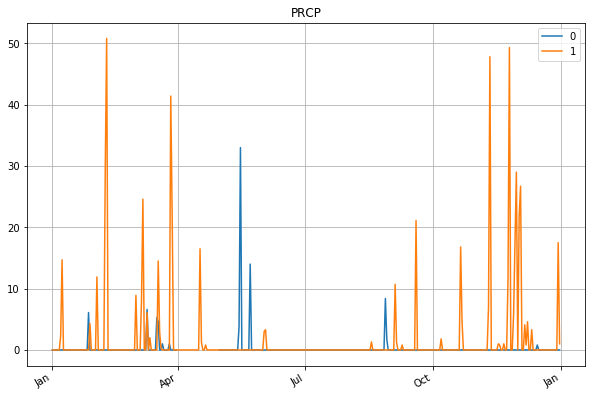

In [30]:
from YearPlotter import YearPlotter
fig, ax = plt.subplots(figsize=(10,7));
YP=YearPlotter()
YP.plot(T[:2,:].transpose(),fig,ax,title='PRCP')
#title('A sample of graphs');

### Distribution of missing observations
The distribution of missing observations is not uniform throughout the year. We visualize it below.

In [31]:
def plot_pair(pair,func):
    j=0
    fig,X=subplots(1,2,figsize=(16,6))
    axes=X.reshape(2)
    for m in pair:
        axis = axes[j]
        j+=1
        func(m,fig,axis)
        
def plot_valid(m,fig,axis):
    valid_m=STAT[m]['NE']
    YP.plot(valid_m,fig,axis,title='valid-counts '+m)
    

/Users/andy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


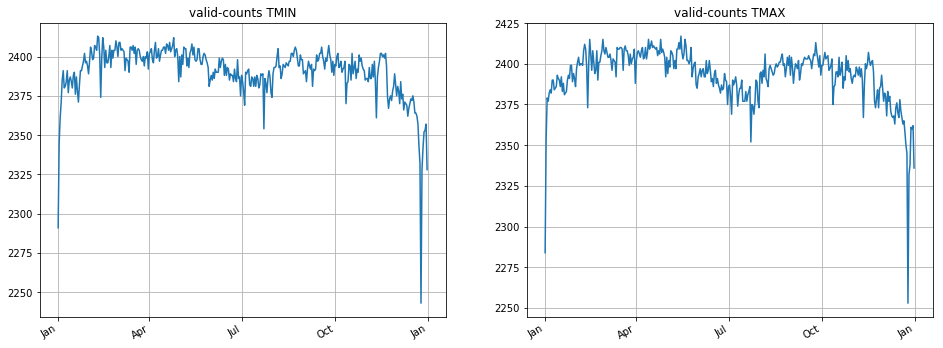

In [32]:
plot_pair(['TMIN','TMAX'],plot_valid)

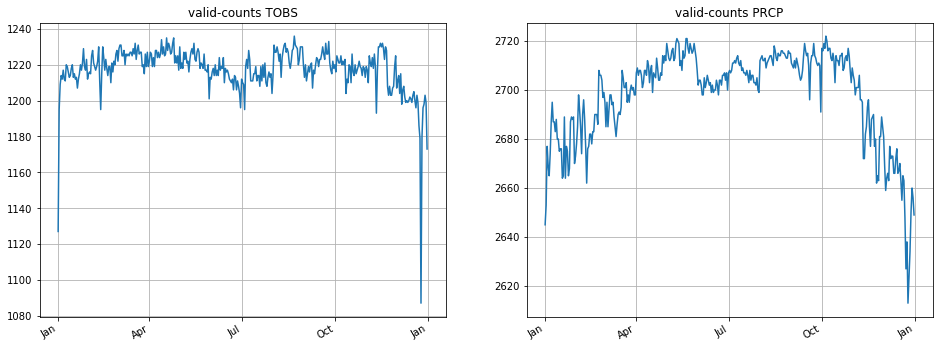

In [33]:
plot_pair(['TOBS','PRCP'],plot_valid)

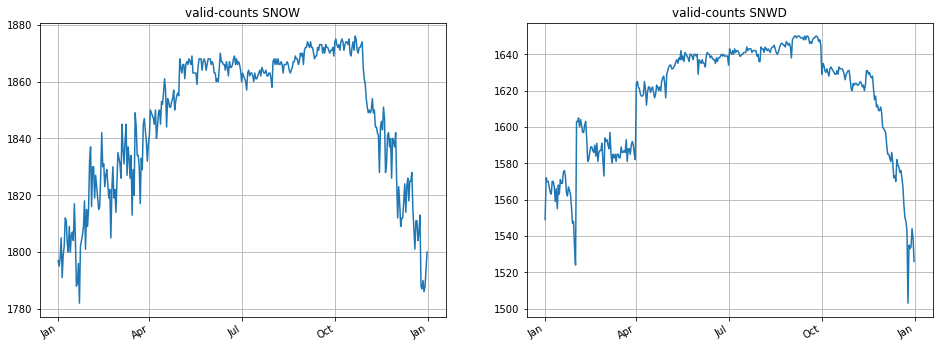

In [34]:
plot_pair(['SNOW', 'SNWD'],plot_valid)

### Plots of mean and std of observations

In [38]:
def plot_mean_std(m,fig,axis):
    mean=STAT[m]['Mean']
    std=np.sqrt(STAT[m]['Var'])
    graphs=np.vstack([mean-std,mean,mean+std]).transpose()
    graphs=np.vstack([(mean+std)/10.,mean/10.,(mean-std)/10.]).transpose()
    YP.plot(graphs,fig,axis,title='Mean+-std   '+m,labels = ['Mean+std','Mean','Mean-std'])

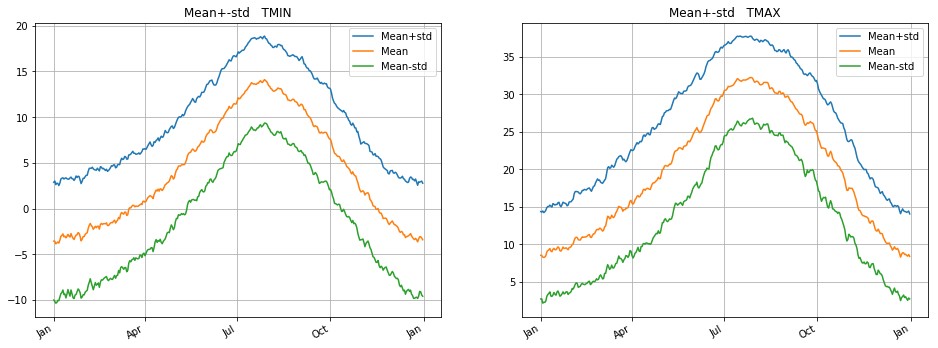

In [42]:
plot_pair(['TMIN','TMAX'],plot_mean_std)

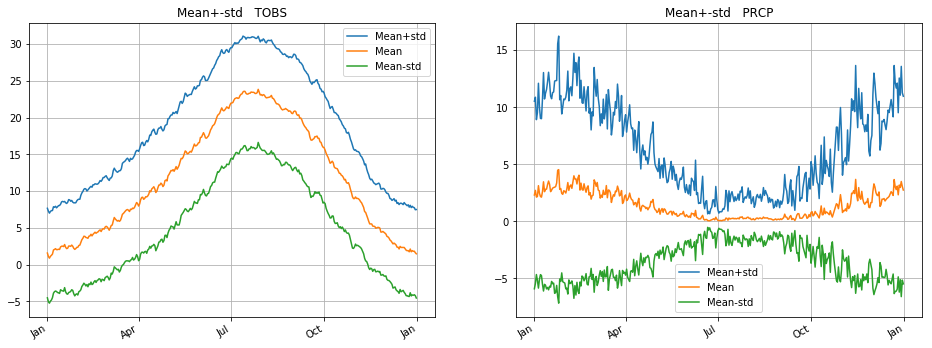

In [43]:
plot_pair(['TOBS','PRCP'],plot_mean_std)

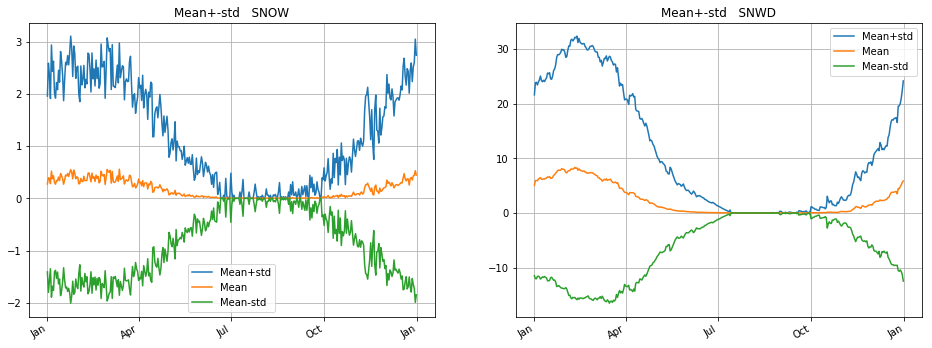

In [44]:
plot_pair(['SNOW', 'SNWD'],plot_mean_std)

### plotting top 3 eigenvectors

In [45]:
def plot_eigen(m,fig,axis):
    EV=STAT[m]['eigvec']
    YP.plot(EV[:,:3],fig,axis,title='Top Eigenvectors '+m)

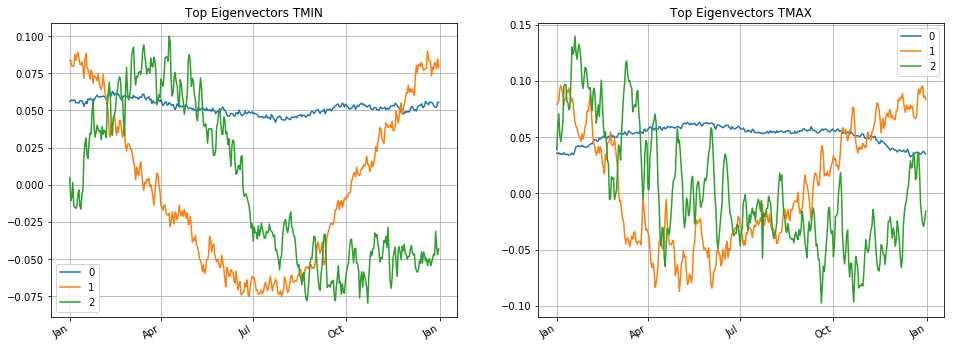

In [46]:
plot_pair(['TMIN','TMAX'],plot_eigen)

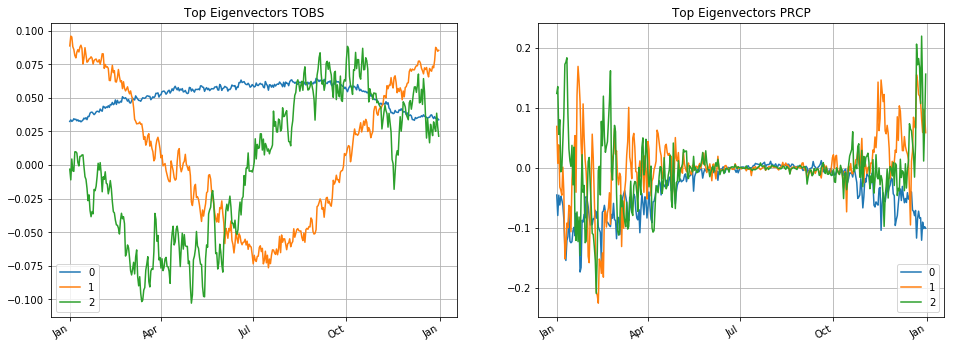

In [47]:
plot_pair(['TOBS','PRCP'],plot_eigen)

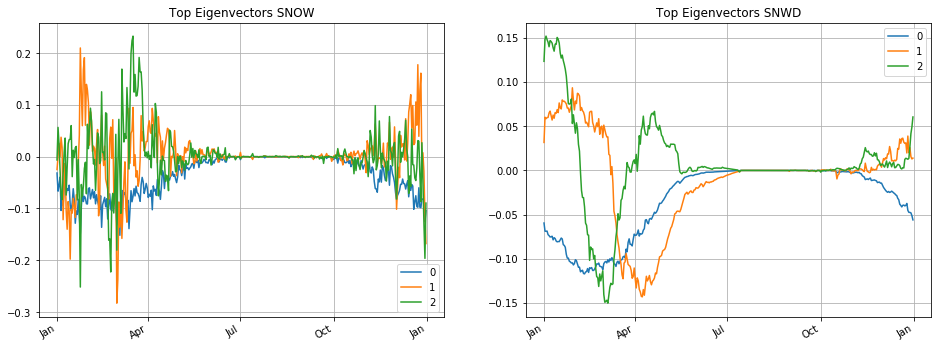

In [48]:
plot_pair(['SNOW', 'SNWD'],plot_eigen)

### Script for plotting percentage of variance explained

In [49]:
def pltVarExplained(j):
    subplot(1,3,j)
    EV=STAT[m]['eigval']
    k=5
    plot(([0,]+list(cumsum(EV[:k])))/sum(EV))
    title('Percentage of Variance Explained for '+ m)
    ylabel('Percentage of Variance')
    xlabel('# Eigenvector')
    grid()
    

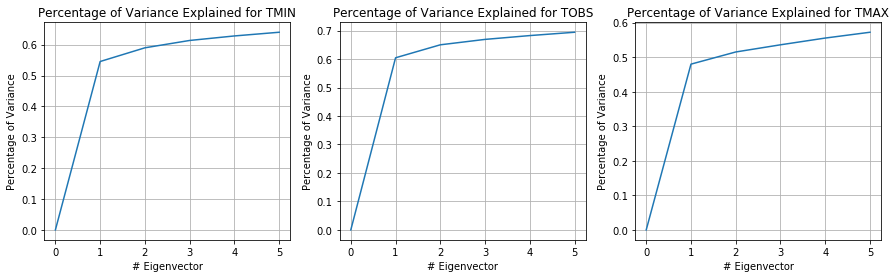

In [50]:
f=plt.figure(figsize=(15,4))
j=1
for m in ['TMIN', 'TOBS', 'TMAX']: #,
    pltVarExplained(j)
    j+=1

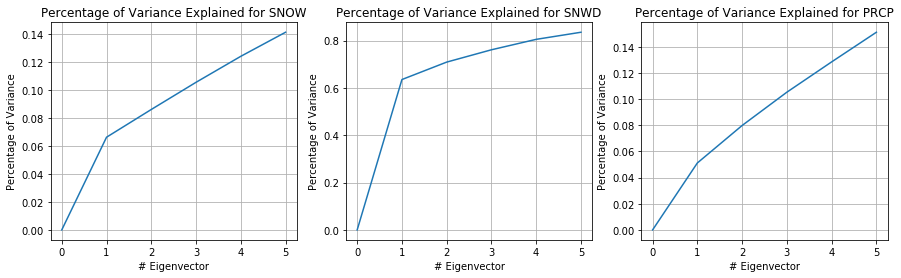

In [51]:
f=plt.figure(figsize=(15,4))
j=1
for m in ['SNOW', 'SNWD', 'PRCP']:
    pltVarExplained(j)
    j+=1 

In [52]:
#sc.stop()